# Exercise 08

For the following function 

$\begin{eqnarray}
P(x)=x\textrm{e}^{-x}  \hspace{2cm}  0\leq x < \infty
\end{eqnarray}$

(a) Find the mean and standard deviation. What is the probability content in the interval (mean-standard deviation, mean+standard deviation).

(b) Find the median and 68% central interval.

(c) Find the mode and 68% smallest interval.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def P(x):
    return x*np.exp(-x)

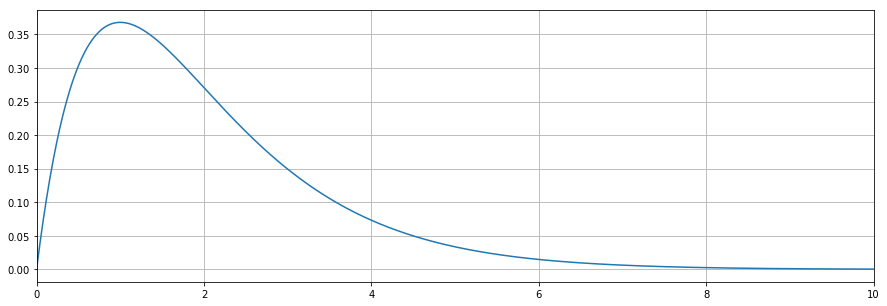

In [4]:
plt.figure(figsize=(15, 5))
xdata = np.arange(0.,20., 0.01)
ydata = P(xdata)
plt.plot(xdata,ydata)
plt.grid()
plt.xlim(0,10)
plt.show()

Mean:
\begin{align}
E(x) = \mu = \int\limits_{0}^{\infty}xP(x)\mathrm{d}x = \int\limits_{0}^{\infty}x^2\mathrm{e}^{-x}\mathrm{d}x = \big[-\textrm{e}^x(x^2+2x+2)\big]_0^{\infty} = 2
\end{align}

Variance:  
\begin{align}
V(x) &= \int\limits_{0}^{\infty}(x-\mu)^2P(x)\mathrm{d}x = \int\limits_{0}^{\infty}(x-2)^2P(x)\mathrm{d}x = \int\limits_{0}^{\infty}(x-2)^2x\textrm{e}^{-x}\mathrm{d}x \\
&= \big[-\textrm{e}^x(x^3-x2+2x+2)\big]_0^{\infty} = 2 \\
\sigma &= \sqrt{V(x)} = 1.414213
\end{align}

Probabilty contentent, $P_{\pm\sigma}$, between $x_1=\mu-\sigma$ and $x_2=\mu+\sigma$:
\begin{align}
    P_{\pm\sigma} &= \int\limits_{x_1}^{x_2}P(x)\textrm{d}x \approx 0.73752
\end{align}

Median $x_{med}$:
\begin{align}
    P(x_{med}) &= \int\limits_{0}^{x_{med}}P(x)\textrm{d}x = \int\limits_{x_{med}}^{1}P(x)\textrm{d}x = 0.5
\end{align}
\begin{align}
   \int\limits_{a}^{b}P(x)\textrm{d}x &= \big[-\textrm{e}^{-x}(x+1)\big]_{a}^{b}
\end{align}
\begin{align}
  0.5 &= \big[-\textrm{e}^{-x}(x+1)\big]_{0}^{x_{med}} = \textrm{e}^{-x_{med}}(x_{med}+1)
\end{align}
\begin{align}
  x_{med} \approx 1.67835
\end{align}


Central interval $[x_{c1},x_{c2}]$ with $1-\alpha = 68\%$
\begin{align}
    \int\limits_0^{x_{c1}}P(x)\textrm{d}x = \alpha/2 = 0.16
\end{align}
\begin{align}
    \int\limits_{x_{c2}}^{\infty}P(x)\textrm{d}x = \alpha/2 = 0.16
\end{align}
same as for $x_{med}$. Thus,
\begin{align}
    x_{c1} &\approx 0.712038 \\
    x_{c2} &\approx 3.28852
\end{align}

Mode $x^*$:
\begin{align}
    P(x^*) &= max(P(x))
\end{align}

\begin{align}
    \dfrac{\textrm{d}P}{\textrm{d}x}(x^*) &= 0 \\
    0 &= -\textrm{e}^{-x}(x-1) \hspace{2cm}\textrm{just one root}\\
    x^* &= 1
\end{align}

smallest interval $SI = [x_{s1},x_{s2}]$ ($x^* \in SI$):

Look at the plot $\rightarrow$ just one maximum

\begin{align}
    P(x_{s1}) &= P(x_{s2}) \\
    x_{s1}\textrm{e}^{-x_{s1}} &= x_{s2}\textrm{e}^{-x_{s2}} \\
     0.68 &= \int\limits_{x_{s1}}^{x_{s2}}P(x)\textrm{d}x = -\textrm{e}^{-x_{s2}}(x_{s2}+1)+\textrm{e}^{-x_{s1}}(x_{s1}+1)\\
        0.68 &= \textrm{e}^{-x_{s1}}-\textrm{e}^{-x_{s2}}\\
\end{align}

solve this numerically

In [13]:
xdata = np.arange(0.,15.,0.001)
ydata = P(xdata)
l = len(xdata)
stepsize= xdata[2]-xdata[1]
print("Length of xdata array is: l=%d" % l)
print("Stepsize = %f" % stepsize)
print("'xdata' are the right edges of the bins.")
print("bin 1: from (-0.1,0.0] -> it is empty. The only valid point in this interval is 0 and it has the value 0.")
print("bin 2: from 0.00000001 to 0.1: (0.,0.1] -> the value of its is %.2f" % ydata[1])
print("!!! Python starts indexing at 0 -> Bin 1 has index 0 !")

Length of xdata array is: l=15000
Stepsize = 0.001000
'xdata' are the right edges of the bins.
bin 1: from (-0.1,0.0] -> it is empty. The only valid point in this interval is 0 and it has the value 0.
bin 2: from 0.00000001 to 0.1: (0.,0.1] -> the value of its is 0.00
!!! Python starts indexing at 0 -> Bin 1 has index 0 !


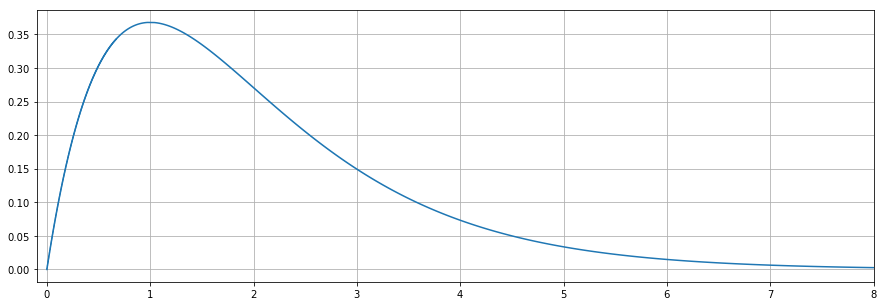

In [14]:
plt.figure(figsize=(15, 5))
plt.step(xdata,ydata)
plt.grid('on')
plt.xlim(-0.1,8)
plt.show()

## (a) Find the mean and standard deviation. What is the probability content in the interval (mean-standard deviation, mean+standard deviation).

In [15]:
def calc_mean(xdata, ydata):
    mean = 0.
    area = 0.
    for i in range(1,len(xdata)):
        mean += (xdata[i]-0.5*stepsize)*ydata[i]  # use midpoints of interval
        area += abs(ydata[i])
    return mean/area

def calc_std(xdata, ydata, mean):
    std = 0.
    area = 0.
    for i in range(0,len(xdata)):
        std += (xdata[i]-0.5*stepsize-mean)**2*ydata[i]
        area += abs(ydata[i])
    return np.sqrt(std/area)

def calc_total_probability(xdata,ydata):
    total_prob = 0.
    for i in range(0,len(xdata)):
        total_prob += ydata[i]*stepsize
    return total_prob

In [16]:
mean = calc_mean(xdata,ydata)
std = calc_std(xdata,ydata,mean)
total_probability = calc_total_probability(xdata,ydata)
print("mean: = %.3f" % mean)
print("standard deviation: = %.3f" % std)
print("total probability: = %.3f" % total_probability)

mean: = 1.999
standard deviation: = 1.414
total probability: = 1.000


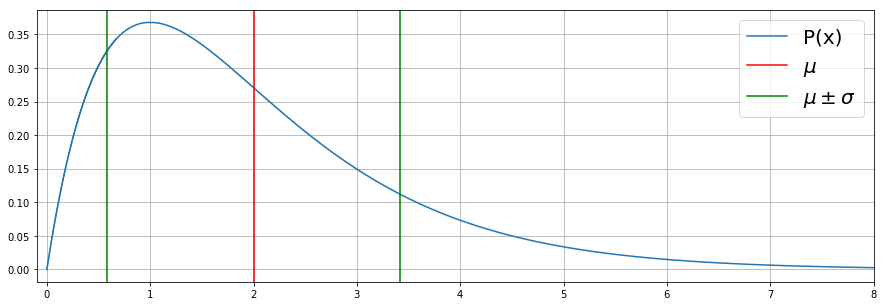

In [17]:
plt.figure(figsize=(15, 5))
plt.step(xdata,ydata, label="P(x)")
plt.grid('on')
plt.xlim(-0.1,8)

plt.axvline(mean, color='red', label=r"$\mu$")
plt.axvline(mean-std, color='green', label=r"$\mu\pm\sigma$")
plt.axvline(mean+std, color='green')

plt.legend(fontsize=20)
plt.show()

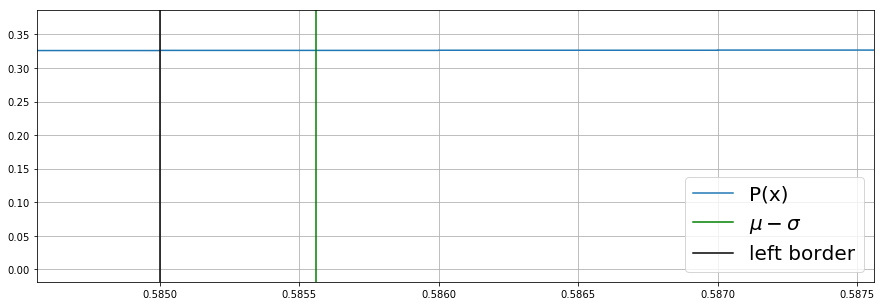

586

In [18]:
# First: Get left index of the interval:
idx_l = 0
for i in range(0,len(xdata)):
    if xdata[i] >= (mean-std):
        idx_l = i
        break

plt.figure(figsize=(15, 5))
plt.step(xdata,ydata, label="P(x)")
plt.grid('on')
plt.xlim((mean-std)-1*stepsize,(mean-std)+2*stepsize)

plt.axvline(mean-std, color='green', label=r"$\mu-\sigma$")
plt.axvline(xdata[idx_l-1], color='black', label=r"left border")

plt.legend(fontsize=20)
plt.show()
idx_l

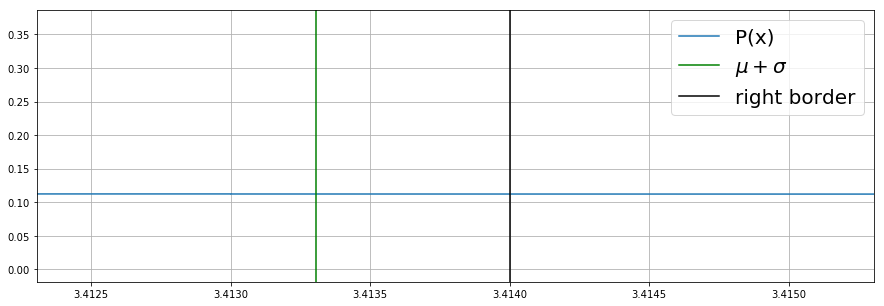

3414

In [19]:
# Second: Get right index of the interval:
idx_r = len(xdata)-1
for i in range(1,len(xdata)):
    if xdata[i] >(mean+std):
        idx_r = i
        break
        
plt.figure(figsize=(15, 5))
plt.step(xdata,ydata, label="P(x)")
plt.grid('on')
plt.xlim((mean+std)-1*stepsize,(mean+std)+2*stepsize)

plt.axvline(mean+std, color='green', label=r"$\mu+\sigma$")
plt.axvline(xdata[idx_r], color='black', label=r"right border")

plt.legend(fontsize=20)
plt.show()
idx_r

In [20]:
# Check:
print(idx_l, idx_r)
if idx_l == 0:
    check = 2*std < xdata[idx_r]-xdata[idx_l]
else:
    check = 2*std < xdata[idx_r]-xdata[idx_l-1]
check

(586, 3414)


True

In [21]:
# Sum up the bin entries of the bins of the interval
p_std = 0.
for i in range(idx_l, idx_r):
    p_std += ydata[i]
p_std *= stepsize
p_std

0.73753198722446822

## (b) Find the median and 68% central interval.

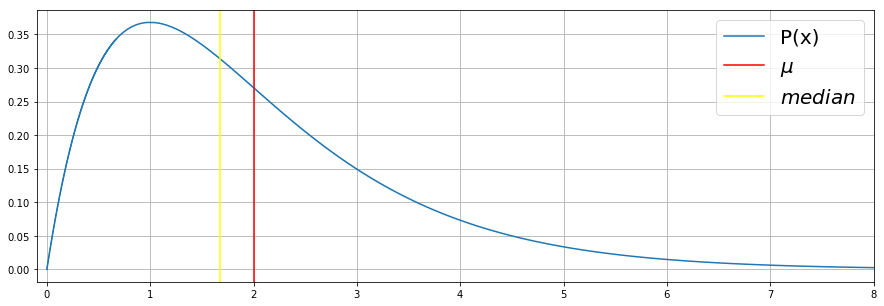

idx_median=1678
x(idx_median) = 1.68
P(idx_median)=0.31


In [22]:
def idx_median(xdata,ydata):
    idx_median = 0
    cumulative_sum = 0.
    for i in range(0,len(xdata)):
        cumulative_sum += ydata[i]*stepsize   
        if cumulative_sum >= 0.5:
            idx_median = i
            break    
    return idx_median

idx_median = idx_median(xdata,ydata)

plt.figure(figsize=(15, 5))
plt.step(xdata,ydata, label="P(x)")
plt.grid('on')
plt.xlim(-0.1,8)

plt.axvline(mean, color='red', label=r"$\mu$")
plt.axvline(xdata[idx_median], color='yellow', label=r"$median$")

plt.legend(fontsize=20)
plt.show()

print("idx_median=%d" % idx_median)
print("x(idx_median) = %.2f" % (xdata[idx_median]-0.5*stepsize))
print("P(idx_median)=%.2f" % ydata[idx_median])

Now the central interval with $1-\alpha=68\% \rightarrow \alpha/2 = 0.16$

Find $r_1$:  $P(r < r_1) \leq \alpha/2 = 0.16$

Find $r_2$:  $P(r > r_2) \leq \alpha/2 = 0.16$

In [23]:
def get_r1(xdata,ydata):
    r1 = 0
    cumulative_sum = ydata[r1]*stepsize
    for i in range(1, len(xdata)):
        if cumulative_sum >= 0.16:
            r1 = i-1
            break
        cumulative_sum += ydata[i]*stepsize
    return r1    

def get_r2(xdata,ydata):
    r2 = len(xdata)-1
    cumulative_sum = ydata[r2]*stepsize
    for i in range(len(xdata)-2,0,-1):
        if cumulative_sum >= 0.16:
            r2 = i+1
            break
        cumulative_sum += ydata[i]*stepsize
    return r2

In [24]:
r1 = get_r1(xdata,ydata)
print("r_1 = %d" % r1)
#Check
checksum=0.
for i in range(0,r1):
    checksum+=ydata[i]*stepsize
print("checksum(r1) = %f" % checksum)
print("checksum(r1+1) = %f" % (checksum+ydata[r1]*stepsize))
print("x(r1) = %.2f" % (xdata[r1-1]))
    
    
r2 = get_r2(xdata,ydata)
print("r_2 = %d" % r2)
checksum=0.
for i in range(r2+1,len(xdata)):
    checksum+=ydata[i]*stepsize
print("checksum(r2) = %f" % checksum)
print("checksum(r2-1) = %f" % (checksum+ydata[r2-1]*stepsize))
print("x(r2) = %.2f" % (xdata[r2]))

r_1 = 712
checksum(r1) = 0.159812
checksum(r1+1) = 0.160161
x(r1) = 0.71
r_2 = 3288
checksum(r2) = 0.159998
checksum(r2-1) = 0.160121
x(r2) = 3.29


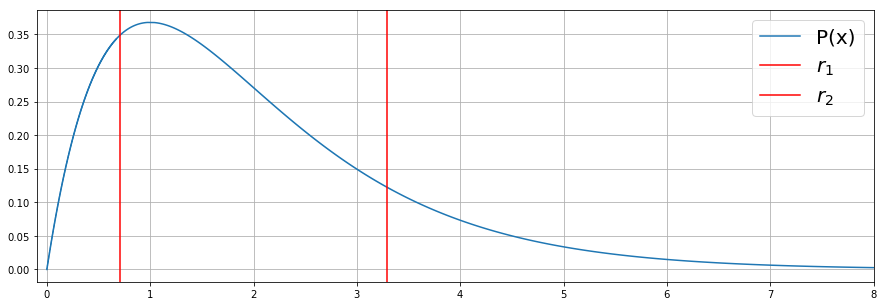

In [25]:
plt.figure(figsize=(15, 5))
plt.step(xdata,ydata, label="P(x)")
plt.grid('on')
plt.xlim(-0.1,8)

plt.axvline(xdata[r1-1], color='red', label=r"$r_1$")
plt.axvline(xdata[r2]  , color='red', label=r"$r_2$")
plt.legend(fontsize=20)
plt.show()

## (c) Find the mode and 68% smallest interval.

In [26]:
def idx_mode(xdata,ydata):
    idx_mode = 0
    maximum = ydata[0]
    for i in range(1,len(xdata)):  
        if ydata[i] == maximum:
            print("WARNING! -> Double Mode!")
        if ydata[i] > maximum:
            idx_mode = i
            maximum = ydata[i]
    return idx_mode

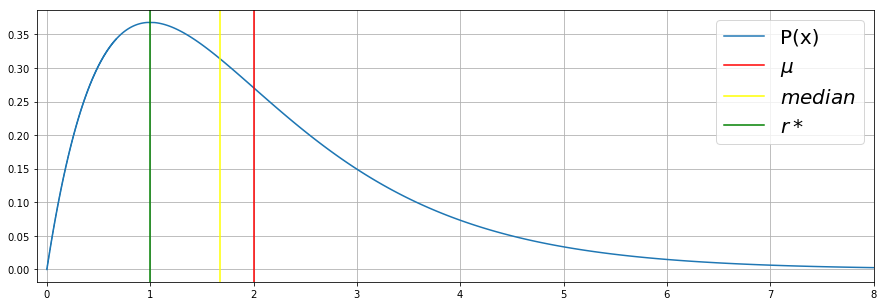

idx_mode=1000
x(idx_mode=1.00
P(idx_mode)=0.367879


In [27]:
idx_mode = idx_mode(xdata,ydata)

plt.figure(figsize=(15, 5))
plt.step(xdata,ydata, label="P(x)")
plt.grid('on')
plt.xlim(-0.1,8)

plt.axvline(mean, color='red', label=r"$\mu$")
plt.axvline(xdata[idx_median], color='yellow', label=r"$median$")
plt.axvline(xdata[idx_mode]-0.5*stepsize, color='green', label=r"$r*$")

plt.legend(fontsize=20)
plt.show()

print("idx_mode=%d" % idx_mode)
print("x(idx_mode=%.2f" % (xdata[idx_mode]-0.5*stepsize))
print("P(idx_mode)=%f" % ydata[idx_mode])

In [28]:
def create_ranking(ydata):
    indices = np.arange(0,len(ydata))
    a1, ranking = zip(*sorted(zip(ydata, indices)))
    return np.flip(ranking,0)

ranking = create_ranking(ydata)
ranking

array([ 1000,  1001,   999, ..., 14998, 14999,     0])

In [29]:
def determine_smallest_interval(ydata, ranking):
    idx_tmp = 0
    cumulative_sum = ydata[ranking[0]]*stepsize
    for i in range(1,len(ranking)):
        if cumulative_sum >= 0.68:
            break
        idx_tmp = i
        for j in range(i+1, len(ranking)):
            if ydata[ranking[idx_tmp]] == ydata[ranking[j]]:
                idx_tmp = j
            else:
                break
        for k in range(i,idx_tmp+1):
            cumulative_sum += ydata[ranking[k]]*stepsize       
    return ranking[0:idx_tmp+1]
    
smallest_interval_indicies = determine_smallest_interval(ydata, ranking)
smallest_interval_indicies

array([1000, 1001,  999, ...,  271, 2489, 2490])

In [30]:
checksum = 0.
for idx in smallest_interval_indicies:
    checksum += ydata[idx]*stepsize

print("checksum of smallest interval = %.5f" % checksum)

idx_si_1 = min(smallest_interval_indicies)
idx_si_2 = max(smallest_interval_indicies)
print("smallest interval SI = [%.2f, %.2f]" % ((xdata[idx_si_1-1]),(xdata[idx_si_2])) )

checksum of smallest interval = 0.68014
smallest interval SI = [0.27, 2.49]


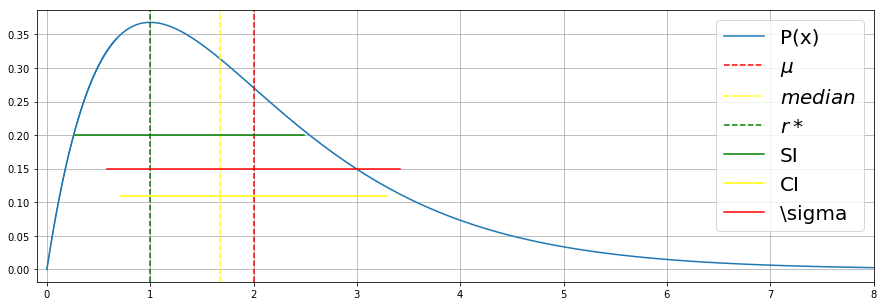

In [31]:
plt.figure(figsize=(15, 5))
plt.step(xdata,ydata, label="P(x)")
plt.grid('on')
plt.xlim(-0.1,8)

plt.axvline(mean, color='red', linestyle='--', label=r"$\mu$")
plt.axvline(xdata[idx_median], color='yellow', linestyle='--', label=r"$median$")
plt.axvline(xdata[idx_mode]-0.5*stepsize, color='green', linestyle='--', label=r"$r*$")

plt.plot( [xdata[idx_si_1-1],xdata[idx_si_2]],[0.2,0.2], color='green', label=r"SI")
plt.plot( [xdata[r1-1],xdata[r2]],[0.11,0.11], color='yellow', label=r"CI")
plt.plot( [mean-std,mean+std],[0.15,0.15], color='red', label=r"\sigma")


plt.legend(fontsize=20)
plt.show()